In [106]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [148]:
def random_function(n :int):
    return {
        i: {
            "amplitude": 10**random.uniform(0, 2),
            "damping": random.uniform(0.5, 2),  # Only positive = always decaying
            "frequency": random.uniform(0.0, 60.0),
            "phase": random.uniform(0, 2*np.pi),
        }
        for i in range(n)
    }

def signal_function(params, time) -> float:
    """Generate real-valued exponential signal"""
    return (
        params["amplitude"] 
        * np.exp(-params["damping"] * time) 
        * np.cos(2 * np.pi * params["frequency"] * time + params["phase"])
    )


def salt():
    return np.random.normal(0, 0.2) + 0.05*np.sin(2*np.pi*np.random.random())

def random_sample(param_dict, intervalo, malha):
    
    time_points = np.arange(intervalo[0], intervalo[1], malha)

    result = {
        str(time): {
            'y-coordinate': np.sum([
                signal_function(params, time) 
                for params in param_dict.values()
            ]) + salt(),
            'tempo': time
        }
        for time in time_points
    }
    return pd.DataFrame(result).T

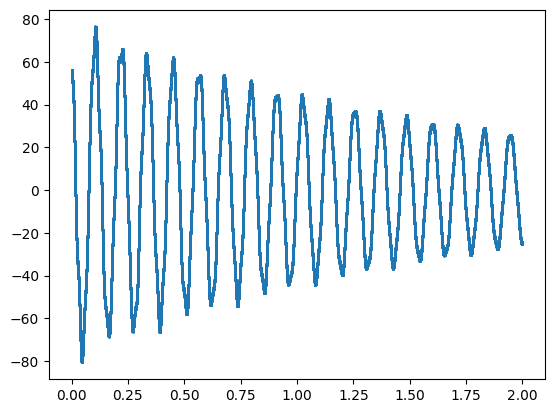

In [162]:
params = random_function(4)
    
df_samples = random_sample(params, (0, 2), 1e-5)
df_samples.to_csv(r"sample.csv")

plt.scatter(df_samples["tempo"], df_samples["y-coordinate"], s = 1)
plt.show()